<a href="https://www.kaggle.com/code/samyak15jain/abortion-tweet-analysis?scriptVersionId=169281678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
!pip install nltk spacy pyLDAvis

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires te

In [3]:
# !conda install -y gdown

In [4]:
# !gdown https://drive.google.com/uc?id=1eEiaiBdIXu9dzX55HupaOOIjOPAk-3oS

In [5]:
import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import pandas as pd 
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """


In [6]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

In [7]:
nlp = spacy.load("en_core_web_sm")
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [8]:
df = pd.read_csv('../input/tweet-data/Copy of tweet_data_thinttspo.csv')
df.columns =['Datetime','Tweetid','Text','Username','retweet','likes','reply','qoute count','hashtags','mention','rp','retweetedtweets','query','okbro']
df

,Datetime,Tweetid,Text,Username,retweet,likes,reply,qoute count,hashtags,mention,rp,retweetedtweets,query,okbro
0,2022-07-12 09:49:36+00:00,1.546790e+18,@NickDesideri There’s a straight line from eug...,rmzwoz,0,0,0,0,NaN,"[User={username:'NickDesideri', id:3124087407,...",https://twitter.com/NickDesideri,NaN,abortion,NaN
1,2022-07-12 09:49:23+00:00,1.546790e+18,@Emilydische @LRB @burner___herzog Not arguing...,dizzylimit,0,0,0,0,NaN,"[User={username:'Emilydische', id:73240905, di...",https://twitter.com/Emilydische,NaN,abortion,NaN
2,2022-07-12 09:49:23+00:00,1.546790e+18,@Try2StopME @redpilledmgtow They avoid marriag...,KingidteinSumit,0,0,0,0,NaN,"[User={username:'Try2StopME', id:73563870, dis...",https://twitter.com/Try2StopME,NaN,abortion,NaN
3,2022-07-12 09:49:20+00:00,1.546790e+18,@MSNBC @feministabulous I do hope good sense i...,desaldd1,0,0,0,0,NaN,"[User={username:'MSNBC', id:2836421, displayna...",https://twitter.com/desaldd1,NaN,abortion,NaN
4,2022-07-12 09:49:19+00:00,1.546790e+18,"@AOC Abortion isn’t health care, it’s murder!",Thepatriotpar11,0,0,0,0,NaN,"[User={username:'AOC', id:138203134, displayna...",https://twitter.com/AOC,NaN,abortion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2022-06-29 12:24:58+00:00,1.542120e+18,"@DempMcgee If u are able to defend urself, ur ...",SecretMechanist,0,2,0,0,NaN,"[User={username:'DempMcgee', id:89114116622118...",https://twitter.com/DempMcgee,NaN,abortion,NaN
1048571,2022-06-29 12:24:57+00:00,1.542120e+18,@samo_iamo @people It actually is there job to...,Tweeter08487714,0,0,1,0,NaN,"[User={username:'samo_iamo', id:15332662354622...",https://twitter.com/samo_iamo,NaN,abortion,NaN
1048572,2022-06-29 12:24:57+00:00,1.542120e+18,"In Flurry of Court Activity, Rulings on Aborti...",WandaRufin,0,0,0,0,NaN,"[User={username:'newsmax', id:20545835, displa...",NaN,NaN,abortion,NaN
1048573,2022-06-29 12:24:57+00:00,1.542120e+18,South Carolina abortion ban goes into effect h...,RadarsTrend,0,0,0,0,NaN,NaN,NaN,NaN,abortion,NaN


In [9]:

len(df)

1048575

In [10]:
usernumber = df['Username'].unique()
print(len(usernumber))

427750


In [11]:
likes = df["likes"].sum()
print(likes)

19166729


In [12]:
retweet = df["retweet"].sum()
print(retweet)

3769525


In [13]:
reply = df["reply"].sum()
print(reply)

1329043


In [14]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Datetime         1048575 non-null  object 
 1   Tweetid          1048575 non-null  float64
 2   Text             1048575 non-null  object 
 3   Username         1048575 non-null  object 
 4   retweet          1048575 non-null  int64  
 5   likes            1048575 non-null  int64  
 6   reply            1048575 non-null  int64  
 7   qoute count      1048575 non-null  int64  
 8   hashtags         75120 non-null    object 
 9   mention          708816 non-null   object 
 10  rp               675950 non-null   object 
 11  retweetedtweets  0 non-null        float64
 12  query            1048575 non-null  object 
 13  okbro            0 non-null        float64
dtypes: float64(3), int64(4), object(7)
memory usage: 112.0+ MB


In [16]:
# df10.info()

In [17]:
# df10['hashtags']

In [18]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# df

In [19]:
df

,Datetime,Tweetid,Text,Username,retweet,likes,reply,qoute count,hashtags,mention,rp,retweetedtweets,query,okbro
0,2022-07-12 09:49:36+00:00,1.546790e+18,@NickDesideri There’s a straight line from eug...,rmzwoz,0,0,0,0,NaN,"[User={username:'NickDesideri', id:3124087407,...",https://twitter.com/NickDesideri,NaN,abortion,NaN
1,2022-07-12 09:49:23+00:00,1.546790e+18,@Emilydische @LRB @burner___herzog Not arguing...,dizzylimit,0,0,0,0,NaN,"[User={username:'Emilydische', id:73240905, di...",https://twitter.com/Emilydische,NaN,abortion,NaN
2,2022-07-12 09:49:23+00:00,1.546790e+18,@Try2StopME @redpilledmgtow They avoid marriag...,KingidteinSumit,0,0,0,0,NaN,"[User={username:'Try2StopME', id:73563870, dis...",https://twitter.com/Try2StopME,NaN,abortion,NaN
3,2022-07-12 09:49:20+00:00,1.546790e+18,@MSNBC @feministabulous I do hope good sense i...,desaldd1,0,0,0,0,NaN,"[User={username:'MSNBC', id:2836421, displayna...",https://twitter.com/desaldd1,NaN,abortion,NaN
4,2022-07-12 09:49:19+00:00,1.546790e+18,"@AOC Abortion isn’t health care, it’s murder!",Thepatriotpar11,0,0,0,0,NaN,"[User={username:'AOC', id:138203134, displayna...",https://twitter.com/AOC,NaN,abortion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2022-06-29 12:24:58+00:00,1.542120e+18,"@DempMcgee If u are able to defend urself, ur ...",SecretMechanist,0,2,0,0,NaN,"[User={username:'DempMcgee', id:89114116622118...",https://twitter.com/DempMcgee,NaN,abortion,NaN
1048571,2022-06-29 12:24:57+00:00,1.542120e+18,@samo_iamo @people It actually is there job to...,Tweeter08487714,0,0,1,0,NaN,"[User={username:'samo_iamo', id:15332662354622...",https://twitter.com/samo_iamo,NaN,abortion,NaN
1048572,2022-06-29 12:24:57+00:00,1.542120e+18,"In Flurry of Court Activity, Rulings on Aborti...",WandaRufin,0,0,0,0,NaN,"[User={username:'newsmax', id:20545835, displa...",NaN,NaN,abortion,NaN
1048573,2022-06-29 12:24:57+00:00,1.542120e+18,South Carolina abortion ban goes into effect h...,RadarsTrend,0,0,0,0,NaN,NaN,NaN,NaN,abortion,NaN


In [20]:
# x = df['hashtags']

# new_df = df["hashtags"]

# info = [new_df[i].replace("User=", "").split() for i in range(len(x)) if "User=" in new_df[i]]
# info = pd.DataFrame(info)

# x = info.iloc[0:, 0]
# x

# user = [i for i in range(len(info)) if "username" in info[i]]
# user
# type(info)
# new_info = [list(info[i]) for i in range(len(info))]
# new_info
## df = df.head(5)
#Vdf["hashtags"]
# df["hashtags"]
# df["hashtags"]

# df = df.head(5)
# new_df = df

# new_df.to_csv("Neural.csv", index=False)



In [21]:
df10 = df[df['hashtags'].notna()]
df10['hashtags'] = df10['hashtags'].apply(eval)
counts=to_1D(df10['hashtags']).value_counts()
counts.to_csv('./bone_hashtag.csv')
counts

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



abortion                10325
RoeVsWade                4734
Abortion                 4172
RoeVWade                 3985
ABORTIONS                3468
                        ...  
thequartering               1
actualjusticewarrior        1
lotuseaters                 1
RiseUpAbortionRights        1
CancelAllStudentDebt        1
Length: 32130, dtype: int64

In [22]:
 
# data = {'name': ['nick', 'david', 'joe', 'ross'],
#         'age': ['5 + 4', '10 + 2', '7 + 5', '6 + 5']} 
# new = pd.DataFrame.from_dict(data)

# new['age'] = new['age'].apply(eval) 
# new

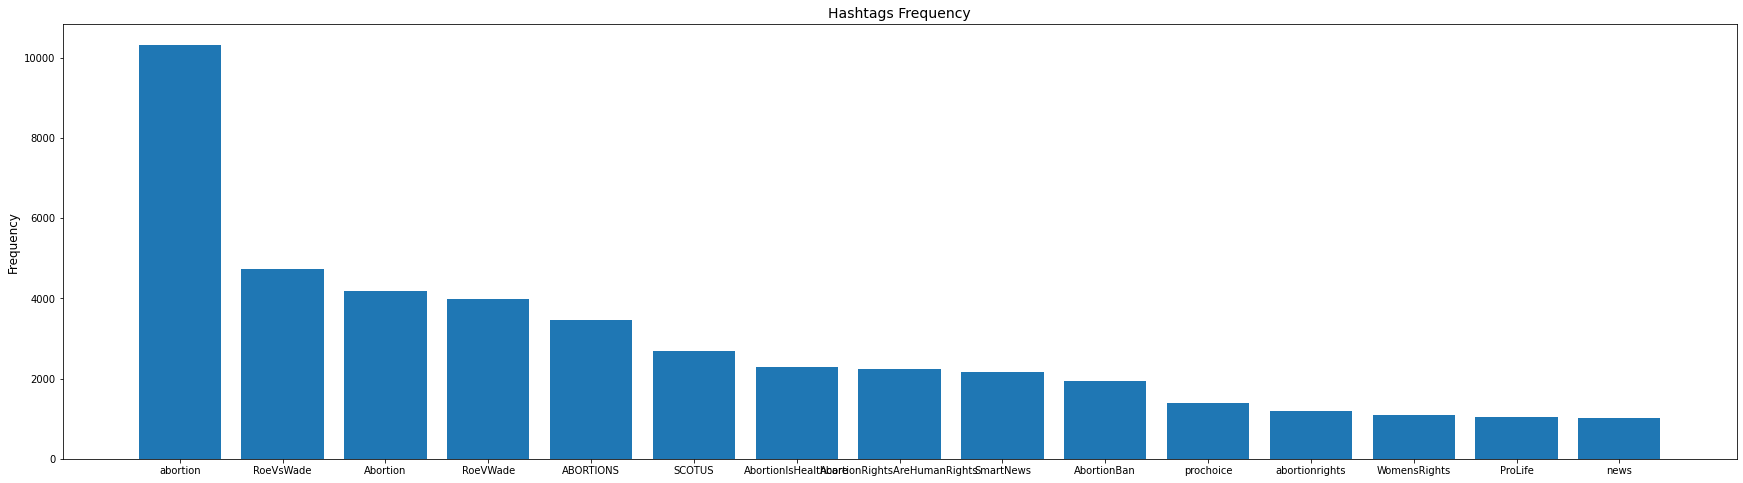

In [23]:
hfig, ax = plt.subplots(figsize = (30,8))
ax.bar(to_1D(df10["hashtags"]).value_counts().head(15).index,
        to_1D(df10["hashtags"]).value_counts().head(15).values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Hashtags Frequency", size = 14)
hfig.savefig('./bone_hashtags_frequency.png')

In [24]:
df_clean = pd.DataFrame(df.Text.apply(lambda x: clean_text(x)))
df_clean["text_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['Text']), axis=1)
df_clean['text_lemmatize_clean'] = df_clean['text_lemmatize'].str.replace('-PRON-', '')

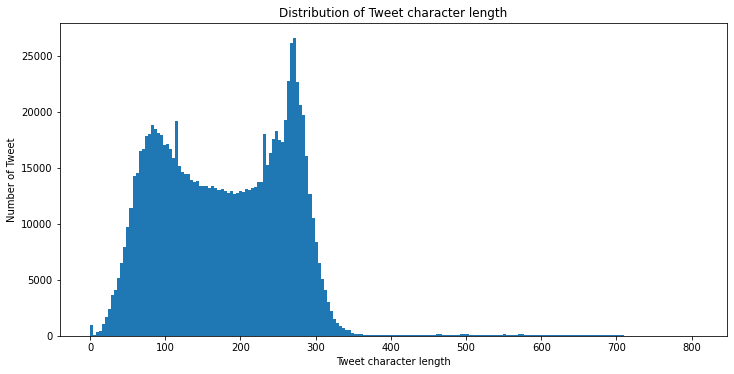

In [25]:
plt.figure(figsize=(10,5))
doc_lens = [len(d) for d in df_clean.Text]
plt.hist(doc_lens,bins=200)
plt.title('Distribution of Tweet character length')
plt.ylabel('Number of Tweet')
plt.xlabel('Tweet character length')
plt.tight_layout(pad = 0)
plt.savefig('./fatspo_tweet_length.png')

add token count ,token vocabulary ,tweet length

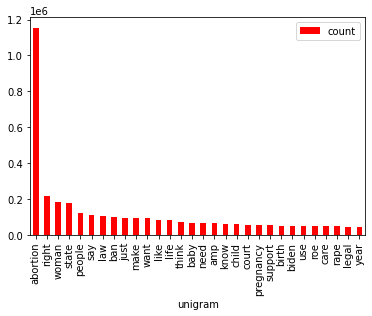

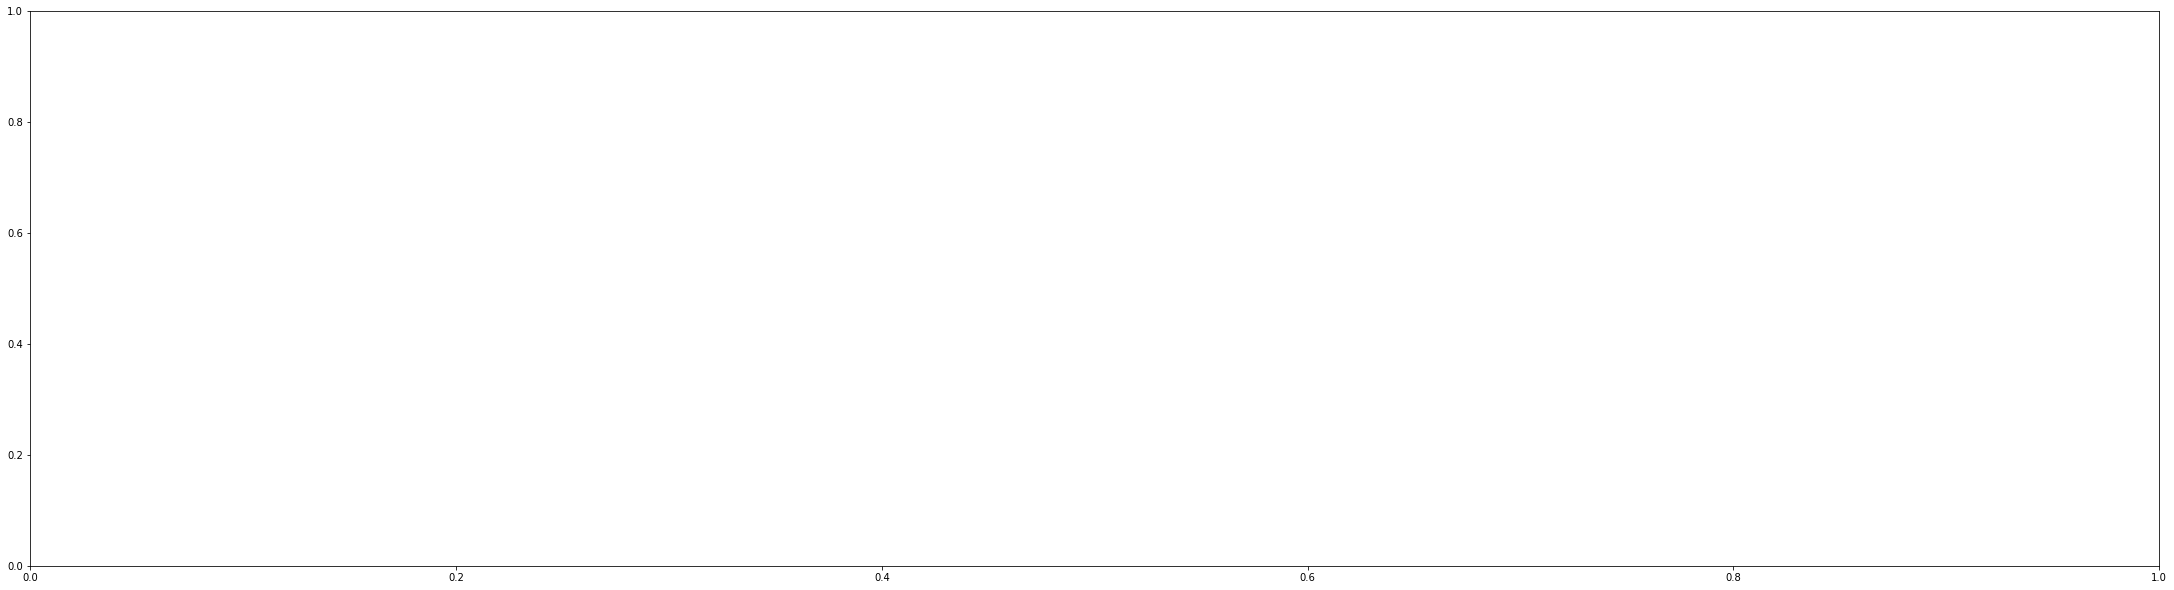

In [26]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_clean['text_lemmatize_clean'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the question text after removing stop words and lemmatization"))
fig.show()

df2.plot(kind = 'bar',
        x = 'unigram',
        y = 'count',
        color = 'red')
plt.subplots(figsize = (30,8))
plt.tight_layout(pad = 0)
plt.savefig('./bone_tweet_frequency.png')

In [27]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,
                             max_df=0.95,                       
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=5000,          
                            )

data_vectorized = vectorizer.fit_transform(df_clean['text_lemmatize_clean'])

lda_model = LatentDirichletAllocation(n_components=6, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming o

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3       1.465019 -47.625065       1        1  23.871619
5      54.854797 -36.476795       2        1  19.518485
4      32.212929 -61.444572       3        1  15.626998
1       5.111096 -14.110332       4        1  15.422035
2      26.350170 -33.374702       5        1  13.258390
0      38.109818  -7.222781       6        1  12.302474, topic_info=           Term           Freq          Total Category  logprob  loglift
4243      state  178913.000000  178913.000000  Default  30.0000  30.0000
2491        law  102909.000000  102909.000000  Default  29.0000  29.0000
3386  pregnancy   57169.000000   57169.000000  Default  28.0000  28.0000
3231     people  119189.000000  119189.000000  Default  27.0000  27.0000
3800      right  219428.000000  219428.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
172         amp   22107.539983   64176.455472   Topic6  -4.2248   1.0297
3800      right   26083.380801  219428.641596   Topic6  -4.0594  -0.0344
2621       lose   10003.079920   14138.206693   Topic6  -5.0178   1.7494
2664       make   11304.411919   92813.349733   Topic6  -4.8955  -0.0100
3190       pass    9853.338970   20214.281772   Topic6  -5.0329   1.3768

[296 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
44        5  0.999990  access
62        5  0.999871  action
122       1  0.999966   agree
150       1  0.114072   allow
150       2  0.129331   allow
...     ...       ...     ...
4942      1  0.999942    word
4977      1  0.138848    year
4977      4  0.685767    year
4977      6  0.175361    year
4987      5  0.999906   young

[347 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 5, 2, 3, 1])

In [28]:
import numpy as np
lda_output = lda_model.transform(data_vectorized)

# column names
# topicnames = df_topic_keywords.T.columns

# index names
docnames = ["Doc" + str(i) for i in range(len(df_clean))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(df_clean, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

df_topic_theme = df_sent_topic[['Text', 'dominant_topic']]
df_topic_theme

,Text,dominant_topic
0,nickdesideri there’s a straight line from euge...,0
1,emilydische lrb burnerherzog not arguing again...,3
2,redpilledmgtow they avoid marriage not the ot...,4
3,msnbc feministabulous i do hope good sense is ...,3
4,aoc abortion isn’t health care it’s murder,3
...,...,...
1048570,dempmcgee if u are able to defend urself ur no...,3
1048571,samoiamo people it actually is there job to go...,3
1048572,in flurry of court activity rulings on abortio...,3
1048573,south carolina abortion ban goes into effect,4


In [29]:
df_topic_theme.to_csv("./bone_topic_example.csv")

In [30]:
import numpy as np
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,choice,vote,pro,support,right,antiabortion,amp,democrats,republican,gop,dem,pill,white,america,filibuster,codify,party,line,prochoice,make
Topic 1,pregnancy,rape,woman,state,life,medical,constitution,case,illegal,year,mother,term,old,child,look,fact,girl,force,pregnant,doctor
Topic 2,right,biden,access,protect,clinic,care,plan,woman,pay,health,healthcare,away,help,prolife,free,amendment,lot,provide,fund,need
Topic 3,right,court,people,baby,make,say,life,just,kill,supreme,decision,woman,want,child,murder,like,think,good,human,really
Topic 4,state,law,ban,roe,right,happen,wade,legal,new,overturn,judge,federal,decide,issue,day,choose,bad,death,texas,ectopic
Topic 5,woman,people,know,birth,like,just,want,control,man,week,think,use,say,tell,support,need,come,time,believe,sex


In [31]:
# while True:pass

coherence and perplexity scores

In [32]:
import sklearn 
n_features = 5000
n_components = 6
n_top_words = 20

# ignore terms that have a document frequency strictly higher than 95%, 
# ignore terms that have a document frequency strictly lower than 2
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=10,
                                   max_features=n_features,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df_clean['text_lemmatize_clean'].values.astype(str))

# alpha=0 means no regularization, l1_ratio=.5, the penalty is a combination of L1 and L2
nmf = sklearn.decomposition.NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
nmf_output = nmf.fit_transform(tfidf)

def show_topics(vectorizer=tfidf_vectorizer, lda_model=nmf, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tfidf_vectorizer, lda_model=nmf, n_words=20)  
df_topic_keywords_nmf = pd.DataFrame(topic_keywords)
df_topic_keywords_nmf.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords_nmf.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords_nmf

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning:

`alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning:

`alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,people,want,just,life,say,baby,like,think,birth,child,make,rape,kill,know,murder,control,need,use,pregnancy,mother
Topic 1,right,constitution,constitutional,human,protect,away,support,vote,privacy,amendment,women,fight,say,filibuster,codify,reproductive,gun,potus,voting,scotus
Topic 2,state,ban,law,federal,legal,allow,constitution,travel,make,judge,decide,illegal,vote,red,pass,florida,scotus,week,line,leave
Topic 3,biden,order,access,executive,sign,protect,president,joe,filibuster,health,pressure,aim,emergency,action,care,safeguard,federal,say,news,face
Topic 4,woman,man,pregnant,die,need,body,pregnancy,choice,choose,want,seek,care,force,black,amp,health,help,white,travel,control
Topic 5,court,supreme,roe,wade,overturn,decision,ruling,rule,texas,law,block,say,clinic,resume,justice,scotus,make,vs,constitutional,new


In [33]:


# column names
# topicnames = df_topic_keywords.T.columns

# index names
docnames1 = ["Doc" + str(i) for i in range(len(df_clean))]

# Make the pandas dataframe
df_document_topic1 = pd.DataFrame(np.round(nmf_output, 2), index=docnames1)

# Get dominant topic for each document
dominant_topic1 = np.argmax(df_document_topic1.values, axis=1)
df_document_topic1['dominant_topic'] = dominant_topic1

df_document_topic1.reset_index(inplace=True)
df_sent_topic1= pd.merge(df_clean, df_document_topic1, left_index=True, right_index=True)
df_sent_topic1.drop('index', axis=1, inplace=True)

df_topic_theme1 = df_sent_topic1[['Text', 'dominant_topic']]
df_topic_theme1

,Text,dominant_topic
0,nickdesideri there’s a straight line from euge...,0
1,emilydische lrb burnerherzog not arguing again...,0
2,redpilledmgtow they avoid marriage not the ot...,4
3,msnbc feministabulous i do hope good sense is ...,0
4,aoc abortion isn’t health care it’s murder,0
...,...,...
1048570,dempmcgee if u are able to defend urself ur no...,0
1048571,samoiamo people it actually is there job to go...,0
1048572,in flurry of court activity rulings on abortio...,5
1048573,south carolina abortion ban goes into effect,0


In [34]:
df_topic_theme1.to_csv("./bone_topic_example_nmf.csv")

coherence scores
get sample tweets for ea

In [35]:
from textblob import TextBlob
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [36]:
df4 = pd.DataFrame(df_clean['text_lemmatize_clean'])
df4['Polarity'] = df4['text_lemmatize_clean'].apply(getPolarity) 
df4['Subjectivity'] = df4['text_lemmatize_clean'].apply(getSubjectivity) 
df4['Analysis'] = df4['Polarity'].apply(analysis)
df4

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


,text_lemmatize_clean,Polarity,Subjectivity,Analysis
0,nickdesideri there ’s a straight line from eug...,0.066667,0.166667,Positive
1,emilydische lrb burnerherzog not argue against...,0.075000,0.408333,Positive
2,redpilledmgtow they avoid marriage not the o...,0.187500,0.437500,Positive
3,msnbc feministabulous I do hope good sense be ...,0.145833,0.262500,Positive
4,aoc abortion be not health care it ’s murder,0.000000,0.000000,Neutral
...,...,...,...,...
1048570,dempmcgee if u be able to defend urself ur not...,0.075000,0.612500,Positive
1048571,samoiamo people it actually be there job to go...,-0.212500,0.387500,Negative
1048572,in flurry of court activity ruling on abortion...,0.000000,0.000000,Neutral
1048573,south carolina abortion ban go into effect,0.000000,0.000000,Neutral


In [37]:
df4.to_csv("./sentiment_example_bone.csv")
df_clean.to_csv("./sentiment_lemmized_bone.csv")

In [38]:
count = df4.Analysis.value_counts()

count

Positive    523274
Negative    263360
Neutral     261941
Name: Analysis, dtype: int64

In [39]:
count = df4.Polarity.mean()
count

0.06065347025581607

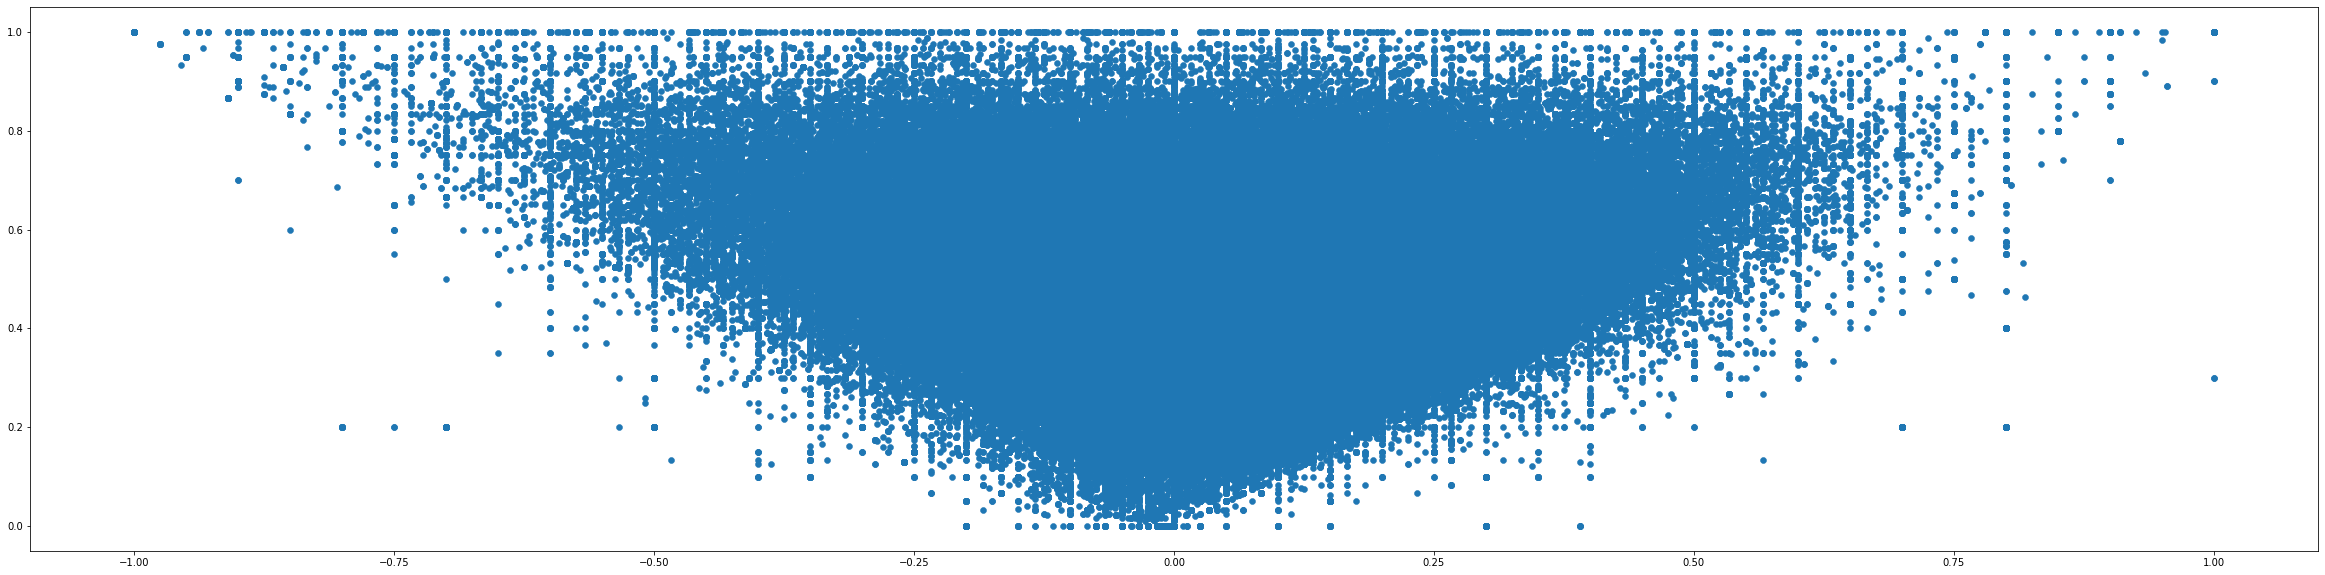

In [40]:
plt.figure(figsize=(41,10))
x = df4.Polarity
y = df4.Subjectivity
plt.scatter(x,y,linewidths=0.5)
plt.savefig('./bone_tweet_senti.png')

In [41]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train, y_test = train_test_split(df_clean['text_lemmatize_clean'],df4['Analysis'] ,
                                                    test_size = 0.10, random_state = 42)
print(f'Data Split done.')

Data Split done.


In [42]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train_)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [43]:
X_train = vectoriser.transform(X_train_)
X_test  = vectoriser.transform(X_test_)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
def model_Evaluate(model,i):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative',"Neutral",'Positive']
    group_names = ['True Neg',"true Neutral",'False Pos',"false" , "f ","g",'False Neg',"Neutral predicted label",'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}' for v1 in group_percentages]
    labels = np.asarray(labels).reshape(3,3)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.savefig('./boneconfusf{}.png'.format(i))

              precision    recall  f1-score   support

    Negative       0.69      0.66      0.68     26312
     Neutral       0.69      0.80      0.74     26314
    Positive       0.84      0.78      0.81     52232

    accuracy                           0.76    104858
   macro avg       0.74      0.75      0.74    104858
weighted avg       0.76      0.76      0.76    104858



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/research /boneconfusf1.png'

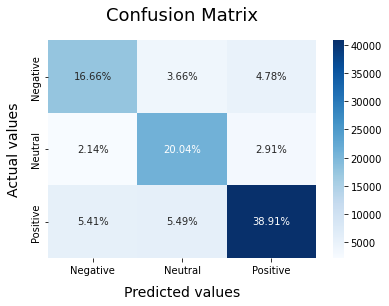

In [45]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel,1)

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel,2)

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel,3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
model_Evaluate(clf,4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10) 

clf.fit(X_train, y_train)
model_Evaluate(clf,5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 20) 

clf.fit(X_train, y_train)
model_Evaluate(clf,6)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 30) 

clf.fit(X_train, y_train)
model_Evaluate(clf,7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 40) 

clf.fit(X_train, y_train)
model_Evaluate(clf,8)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50) 

clf.fit(X_train, y_train)
model_Evaluate(clf,9)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectoriser.fit(X_train_)

In [ ]:
X_train = vectoriser.transform(X_train_)
X_test  = vectoriser.transform(X_test_)

In [ ]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel,10)

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel,11)

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel,12)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
model_Evaluate(clf,13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10) 

clf.fit(X_train, y_train)
model_Evaluate(clf,14)
clf = RandomForestClassifier(n_estimators = 20) 
clf.fit(X_train, y_train)
model_Evaluate(clf,15)
clf = RandomForestClassifier(n_estimators = 30) 
clf.fit(X_train, y_train)
model_Evaluate(clf,16)
clf = RandomForestClassifier(n_estimators = 40) 
clf.fit(X_train, y_train)
model_Evaluate(clf,17)
clf = RandomForestClassifier(n_estimators = 50) 
clf.fit(X_train, y_train)
model_Evaluate(clf,18)